# Import lib

In [20]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [21]:
# The latest CDF library https://spdf.gsfc.nasa.gov/pub/software/cdf/dist/latest/
from spacepy import pycdf

# os.environ["CDF_LIB"] = "C:\\Program Files\\CDF_Distribution\\cdf39_0-dist\\lib"
import os
os.environ["CDF_LIB"] = "/Applications/cdf/cdf39_0-dist/lib"

# *** Library ***
sys.path.append('./lib/')
# import juice_cdf_lib as juice_cdf
import juice_math_lib as juice_math
import juice_sid20_lib as juice_sid20

# *** Folder set ***
work_dir = '/Users/user/0-python/JUICE_GS_test/ql/sid3/'    # Plot dump folder
data_dir = '/Users/user/0-python/JUICE_GS_test/cdf/'        # Data folder

# Setting and Read CDF file

In [22]:
# *** Mode set ***
hz_mode = 0                             # 0: sum    1: /Hz
cal_mode = 0                            # 0: raw    1: dBm＠ADC  2: V@HF   3:V2@HF   4:V2@RWI

# *** Parameter set ***
cal = 0                                 # 0: background   1: cal
f_max = 45000                           # f_max [kHz]
f_min = 80                              # f_min [kHz]
p_max = 8.5                             # background: 8   CAL: 10
p_min = 1.5                             # background: 2   CAL: 5

In [23]:
# *** Conversion factor: cal_mode ***
cf = 0.0                                # Conversion Factor: RAW
if cal_mode == 1:
    cf = -104.1                         # dBm @ ADC 
elif cal_mode == 2:
    cf = -104.1 - 10.00 - 15.0          # V(amplitude) @ HF -- in EM2-1: HF-gain +15dB, ADC: 2Vpp  ==> EM2-3 & later: same [-6dB + 6dB]
elif cal_mode == 3:
    cf = -104.1 - 13.01 - 15.0          # V^2 @ HF (EM2-0 case)
elif cal_mode == 4:
    cf = -104.1 - 13.01 - 15.0 - 5.0    # V^2 @ RWIin -- temporary

# ******************************************************
# [EM2-0]
# "1-bit" = -104.1 dBm = -114.1 dB V  = 1.97E-6 V    ==> "20-bit": 2.06 Vpp
# "HF input"  +15dB(AMP) -3dB(50-ohm) = "+12dB"      ==> "1-bit": 5E-7 V,  Full: 0.5 Vpp
# ******************************************************
# [EM2-3]
# "1-bit" = -110.1 dBm = -110.1 dB V  = 0.99E-7 V "  ==> "20-bit": 1.03 Vpp
# "HF input"  +9dB(AMP)  -3dB(50-ohm受け) = "+6dB"    ==> "1-bit": 5E-7 V,  Full: 0.5 Vpp
# ******************************************************

# *** Max / Min in plots ***
p_max = p_max + cf/10
p_min = p_min + cf/10
if hz_mode == 1:
    p_max = p_max - 5.0
    p_min = p_min - 5.0

In [24]:
# *** Ver.2 ***

# 202308 -- EM3
# data_name = '202308_EM3/Seq1_JUICE_L1a_RPWI-HF-SID20_20230819T155547-20230819T160034_V01___TMIDX_00000.bin.cdf'
# data_name = '202308_EM3/Seq2_JUICE_L1a_RPWI-HF-SID20_20230819T160722-20230819T161209_V01___TMIDX_00000.bin.cdf'

# Tsuchiya
data_name = 'ver2_sample/tsuchiya/JUICE_L1a_RPWI-HF-SID20_20000101T000610-20000101T000954_V01___HF_20211126-1252.ccs.cdf'

# get SID-20 data

In [25]:
cdf_file = data_dir + data_name
%ls $cdf_file

cdf = pycdf.CDF(cdf_file)
data = juice_sid20.juice_getdata_hf_sid20(cdf)

data.EuEu = data.EuEu * 10**(cf/10)
data.EvEv = data.EvEv * 10**(cf/10)
data.EwEw = data.EwEw * 10**(cf/10)
data.EuEu_dB = 10.0 * np.log10(data.EuEu)
data.EvEv_dB = 10.0 * np.log10(data.EvEv)
data.EwEw_dB = 10.0 * np.log10(data.EwEw)

n_freq = data.EuEu.shape[1]
n_time = data.EuEu.shape[0]
n_time0 = n_time-1
print(data.EuEu.shape, n_time, n_freq)

/Users/user/0-python/JUICE_GS_test/cdf/202308_EM3/Seq2_JUICE_L1a_RPWI-HF-SID20_20230819T160722-20230819T161209_V01___TMIDX_00000.bin.cdf*
U: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
V: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [26]:
print(data.epoch)


[datetime.datetime(2023, 8, 19, 16, 7, 22, 102997)
 datetime.datetime(2023, 8, 19, 16, 7, 22, 102997)
 datetime.datetime(2023, 8, 19, 16, 7, 27, 102997)
 datetime.datetime(2023, 8, 19, 16, 7, 28, 102997)
 datetime.datetime(2023, 8, 19, 16, 7, 29, 102997)
 datetime.datetime(2023, 8, 19, 16, 7, 30, 102997)
 datetime.datetime(2023, 8, 19, 16, 7, 31, 102997)
 datetime.datetime(2023, 8, 19, 16, 7, 32, 102997)
 datetime.datetime(2023, 8, 19, 16, 7, 33, 102997)
 datetime.datetime(2023, 8, 19, 16, 7, 34, 102997)
 datetime.datetime(2023, 8, 19, 16, 7, 35, 102997)
 datetime.datetime(2023, 8, 19, 16, 7, 36, 102997)
 datetime.datetime(2023, 8, 19, 16, 7, 37, 102997)
 datetime.datetime(2023, 8, 19, 16, 7, 38, 102997)
 datetime.datetime(2023, 8, 19, 16, 7, 39, 102997)
 datetime.datetime(2023, 8, 19, 16, 7, 40, 102997)
 datetime.datetime(2023, 8, 19, 16, 7, 41, 102997)
 datetime.datetime(2023, 8, 19, 16, 7, 42, 102997)
 datetime.datetime(2023, 8, 19, 16, 7, 43, 102997)
 datetime.datetime(2023, 8, 19,

# Raw data

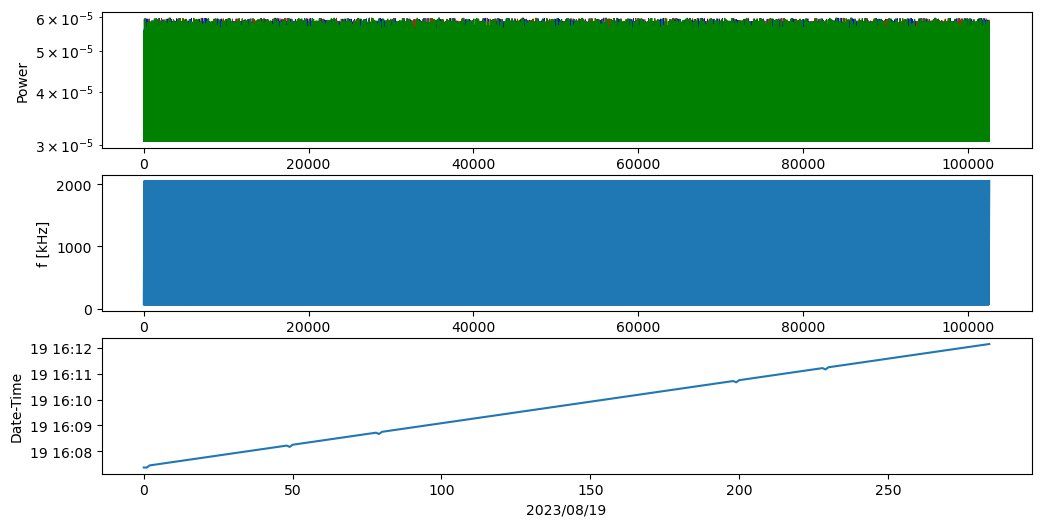

In [27]:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

ax1.plot(np.ravel(data.EuEu), '-r', linewidth=.5)
ax1.plot(np.ravel(data.EvEv), '-b', linewidth=.5)
ax1.plot(np.ravel(data.EwEw), '-g', linewidth=.5)
ax1.set_yscale('log')
ax2.plot(np.ravel(data.frequency))
ax3.plot(np.ravel(data.epoch))

ax1.set_ylabel('Power')
ax2.set_ylabel('f [kHz]')
ax3.set_ylabel('Date-Time')
date = data.epoch[0]
date = date.strftime('%Y/%m/%d')
ax3.set_xlabel(date)

"""
# SPECIAL -- data check
# X-axis
xlim=[0, 491*32+1]
ax1.set_xlim(xlim)
ax2.set_xlim(xlim)
ax3.set_xlim(xlim)
#
# Y-axis
ylim=[-2000, +2000]
ax1.set_ylim(ylim)
# SPECIAL -- data check
"""

fig.show
png_fname = work_dir+data_name+'_2.png'
# fig.savefig(png_fname)

# Original

In [28]:
Epoch_1d = data.epoch.tolist()
freq_1d  = data.frequency[0].tolist()

EuEu_2d = data.EuEu.transpose()
EvEv_2d = data.EvEv.transpose()
EwEw_2d = data.EwEw.transpose()

## FT - LOG

/var/folders/h3/4_tnwr0x0v9gcl5qc0vczzyr0000gn/T/ipykernel_63644/1781599413.py:31: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  p1 = ax1.pcolormesh(Epoch_1d, freq_1d, EuEu_2d, norm=colors.LogNorm(vmin=10**p_min0, vmax=10**p_max0), cmap='jet')
/var/folders/h3/4_tnwr0x0v9gcl5qc0vczzyr0000gn/T/ipykernel_63644/1781599413.py:32: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  p2 = ax2.pcolormesh(Epoch_1d, freq_1d, EvEv_2d, norm=colors.LogNorm(vmin=10**p_min0, vmax=10**p_max0), cmap='jet')
/var/folders/h3/4_tnwr0x0v9gcl5qc0vczzyr0000gn/T/ipykernel_63644/1781599413.py:33: UserWarning: The 

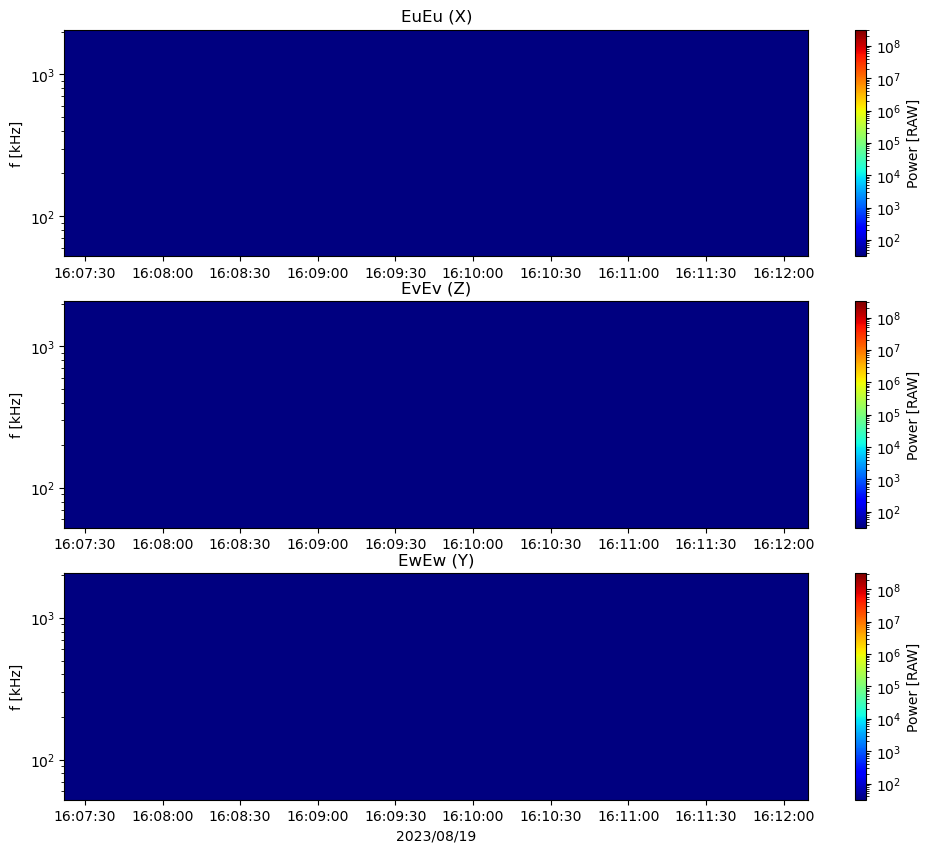

In [29]:
fig2d = plt.figure(figsize=[12,10])

ax1 = fig2d.add_subplot(3, 1, 1)
ax2 = fig2d.add_subplot(3, 1, 2)
ax3 = fig2d.add_subplot(3, 1, 3)

# Plot
p_min0 = p_min
p_max0 = p_max

# Y-axis
#ax1.set_ylim(f_min, f_max)
#ax2.set_ylim(f_min, f_max)
#ax3.set_ylim(f_min, f_max)
ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')
ax1.set_ylabel('f [kHz]')
ax2.set_ylabel('f [kHz]')
ax3.set_ylabel('f [kHz]')

# X-axis
ax1.set_title('EuEu (X)')
ax2.set_title('EvEv (Z)')
ax3.set_title('EwEw (Y)')
date = data.epoch[0]
date = date.strftime('%Y/%m/%d')
ax3.set_xlabel(date)

# Plot
p1 = ax1.pcolormesh(Epoch_1d, freq_1d, EuEu_2d, norm=colors.LogNorm(vmin=10**p_min0, vmax=10**p_max0), cmap='jet')
p2 = ax2.pcolormesh(Epoch_1d, freq_1d, EvEv_2d, norm=colors.LogNorm(vmin=10**p_min0, vmax=10**p_max0), cmap='jet')
p3 = ax3.pcolormesh(Epoch_1d, freq_1d, EwEw_2d, norm=colors.LogNorm(vmin=10**p_min0, vmax=10**p_max0), cmap='jet')

if cal_mode == 0:
    str = 'Power [RAW]'
elif cal_mode == 1:
    str = 'Power [dBm@AD]'
elif cal_mode == 2:
    str = 'Power [V2@ADC]'
pp1 = fig2d.colorbar(p1, ax=ax1, orientation="vertical")
pp1.set_label(str)
pp2 = fig2d.colorbar(p2, ax=ax2, orientation="vertical")
pp2.set_label(str)
pp3 = fig2d.colorbar(p3, ax=ax3, orientation="vertical")
pp3.set_label(str)

plt.show()
png_fname = work_dir+data_name+'_FT-log.png'
# fig2d.savefig(png_fname)


## FT - linear

/var/folders/h3/4_tnwr0x0v9gcl5qc0vczzyr0000gn/T/ipykernel_63644/619814241.py:28: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  p1 = ax1.pcolormesh(Epoch_1d, freq_1d, EuEu_2d, norm=colors.LogNorm(vmin=10**p_min0, vmax=10**p_max0), cmap='jet')
/var/folders/h3/4_tnwr0x0v9gcl5qc0vczzyr0000gn/T/ipykernel_63644/619814241.py:29: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  p2 = ax2.pcolormesh(Epoch_1d, freq_1d, EvEv_2d, norm=colors.LogNorm(vmin=10**p_min0, vmax=10**p_max0), cmap='jet')
/var/folders/h3/4_tnwr0x0v9gcl5qc0vczzyr0000gn/T/ipykernel_63644/619814241.py:30: UserWarning: The inp

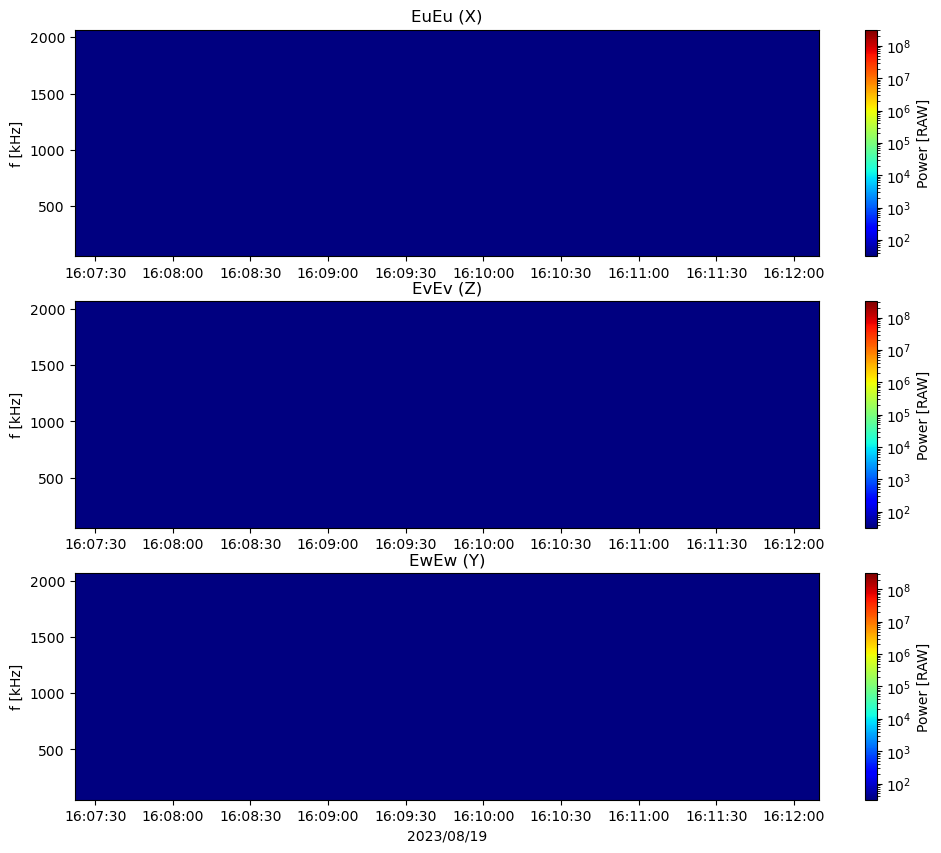

In [30]:
fig2d = plt.figure(figsize=[12,10])

ax1 = fig2d.add_subplot(3, 1, 1)
ax2 = fig2d.add_subplot(3, 1, 2)
ax3 = fig2d.add_subplot(3, 1, 3)

# Plot
p_min0 = p_min
p_max0 = p_max

# Y-axis
# ax1.set_ylim(f_min, f_max)
# ax2.set_ylim(f_min, f_max)
# ax3.set_ylim(f_min, f_max)
ax1.set_ylabel('f [kHz]')
ax2.set_ylabel('f [kHz]')
ax3.set_ylabel('f [kHz]')

# X-axis
ax1.set_title('EuEu (X)')
ax2.set_title('EvEv (Z)')
ax3.set_title('EwEw (Y)')
date = data.epoch[0]
date = date.strftime('%Y/%m/%d')
ax3.set_xlabel(date)

# Plot
p1 = ax1.pcolormesh(Epoch_1d, freq_1d, EuEu_2d, norm=colors.LogNorm(vmin=10**p_min0, vmax=10**p_max0), cmap='jet')
p2 = ax2.pcolormesh(Epoch_1d, freq_1d, EvEv_2d, norm=colors.LogNorm(vmin=10**p_min0, vmax=10**p_max0), cmap='jet')
p3 = ax3.pcolormesh(Epoch_1d, freq_1d, EwEw_2d, norm=colors.LogNorm(vmin=10**p_min0, vmax=10**p_max0), cmap='jet')

if cal_mode == 0:
    str = 'Power [RAW]'
elif cal_mode == 1:
    str = 'Power [dBm@AD]'
elif cal_mode == 2:
    str = 'Power [V2@ADC]'
pp1 = fig2d.colorbar(p1, ax=ax1, orientation="vertical")
pp1.set_label(str)
pp2 = fig2d.colorbar(p2, ax=ax2, orientation="vertical")
pp2.set_label(str)
pp3 = fig2d.colorbar(p3, ax=ax3, orientation="vertical")
pp3.set_label(str)

plt.show()
png_fname = work_dir+data_name+'_FT.png'
# fig2d.savefig(png_fname)

## Spec LOG

In [31]:
Eu_power1 = data.EuEu[0]
Ev_power1 = data.EvEv[0]
Ew_power1 = data.EwEw[0]
Eu_power2 = data.EuEu[n_time0]
Ev_power2 = data.EvEv[n_time0]
Ew_power2 = data.EwEw[n_time0]

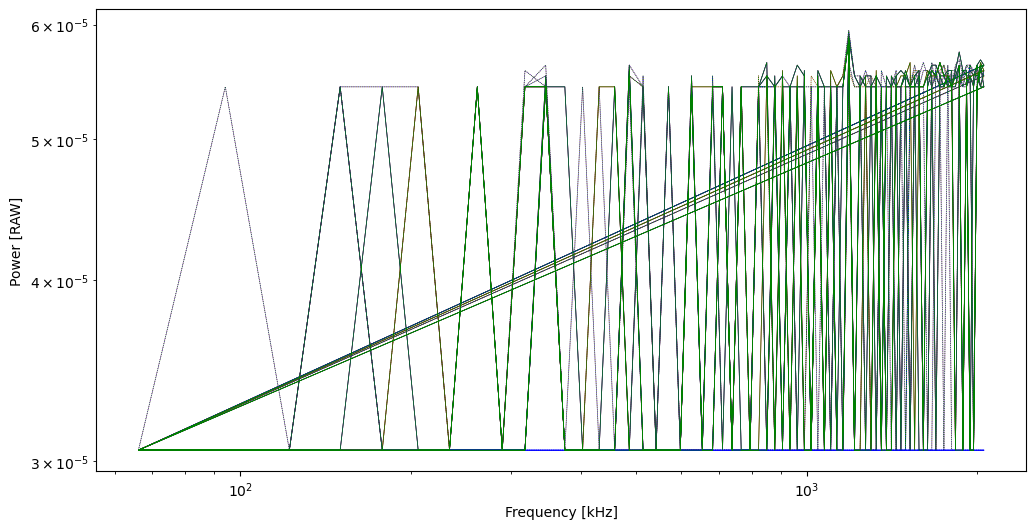

In [32]:
fig, cal = plt.subplots(figsize=(12, 6))

# Plot
p_min0 = p_min
p_max0 = p_max

cal.plot(freq_1d, Eu_power1, ':r', linewidth=.5)
cal.plot(freq_1d, Ev_power1, ':b', linewidth=.5)
cal.plot(freq_1d, Ew_power1, ':g', linewidth=.5)
cal.plot(freq_1d, Eu_power2, '-r', linewidth=.5)
cal.plot(freq_1d, Ev_power2, '-b', linewidth=.5)
cal.plot(freq_1d, Ew_power2, '-g', linewidth=.5)

cal.set_xlabel('Frequency [kHz]')
cal.set_xscale('log')
# cal.set_xlim(f_min, f_max)

cal.set_yscale('log')
if cal_mode == 0:
    plt.ylabel('Power [RAW]')
elif cal_mode == 1:
    plt.ylabel('Power [dBm@AD]')
elif cal_mode == 2:
    plt.ylabel('Power [V^2@ADC]')
# cal.set_ylim(10**p_min0, 10**p_max0)

plt.show
png_fname = work_dir+data_name+'_spec-log.png'
# fig.savefig(png_fname)

## Spec-linear

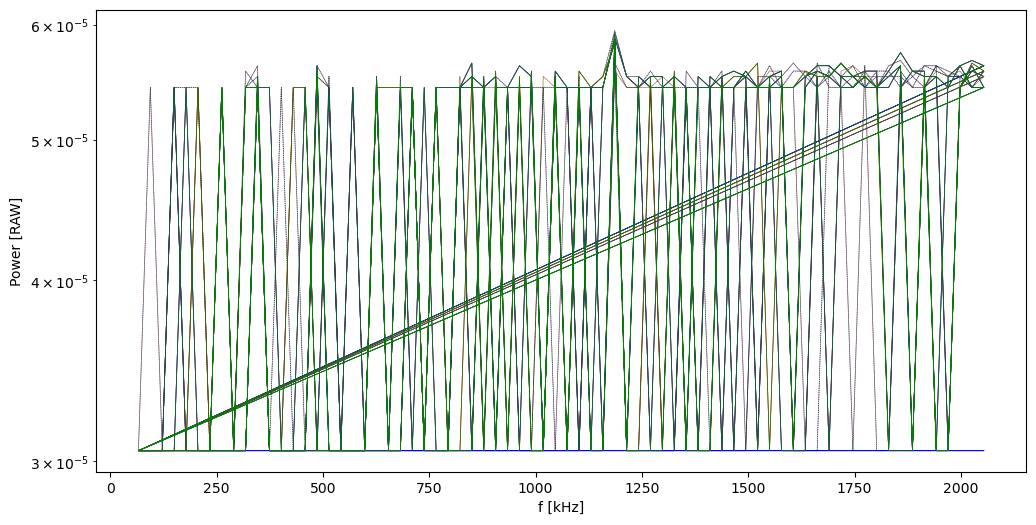

In [33]:
fig, cal = plt.subplots(figsize=(12, 6))

# Plot
p_min0 = p_min
p_max0 = p_max

cal.plot(freq_1d, Eu_power1, ':r', linewidth=.5)
cal.plot(freq_1d, Ev_power1, ':b', linewidth=.5)
cal.plot(freq_1d, Ew_power1, ':g', linewidth=.5)
cal.plot(freq_1d, Eu_power2, '-r', linewidth=.5)
cal.plot(freq_1d, Ev_power2, '-b', linewidth=.5)
cal.plot(freq_1d, Ew_power2, '-g', linewidth=.5)

cal.set_xlabel('f [kHz]')
# cal.set_xlim(f_min, f_max)

cal.set_yscale('log')
if cal_mode == 0:
    plt.ylabel('Power [RAW]')
elif cal_mode == 1:
    plt.ylabel('Power [dBm@AD]')
elif cal_mode == 2:
    plt.ylabel('Power [V^2@ADC]')
# cal.set_ylim(10**p_min0, 10**p_max0)

plt.show
png_fname = work_dir+data_name+'_spec.png'
# fig.savefig(png_fname)

# CLEANED

In [34]:
EuEu_c = juice_math.clean_rfi(np.ravel(data.EuEu))
EvEv_c = juice_math.clean_rfi(np.ravel(data.EvEv))
EwEw_c = juice_math.clean_rfi(np.ravel(data.EwEw))
EuEu_c = EuEu_c.reshape(n_time, n_freq)
EvEv_c = EvEv_c.reshape(n_time, n_freq)
EwEw_c = EwEw_c.reshape(n_time, n_freq)

EuEu_c_2d = EuEu_c.transpose()
EvEv_c_2d = EvEv_c.transpose()
EwEw_c_2d = EwEw_c.transpose()
Eu_c_power1 = EuEu_c[0]
Ev_c_power1 = EvEv_c[0]
Ew_c_power1 = EvEv_c[0]
Eu_c_power2 = EuEu_c[n_time0]
Ev_c_power2 = EvEv_c[n_time0]
Ew_c_power2 = EwEw_c[n_time0]

## CLEANED -- FT LOG

/var/folders/h3/4_tnwr0x0v9gcl5qc0vczzyr0000gn/T/ipykernel_63644/365832123.py:27: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  p1 = ax1.pcolormesh(Epoch_1d, freq_1d, EuEu_c_2d, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')
/var/folders/h3/4_tnwr0x0v9gcl5qc0vczzyr0000gn/T/ipykernel_63644/365832123.py:28: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  p2 = ax2.pcolormesh(Epoch_1d, freq_1d, EvEv_c_2d, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')
/var/folders/h3/4_tnwr0x0v9gcl5qc0vczzyr0000gn/T/ipykernel_63644/365832123.py:29: UserWarning: The inp

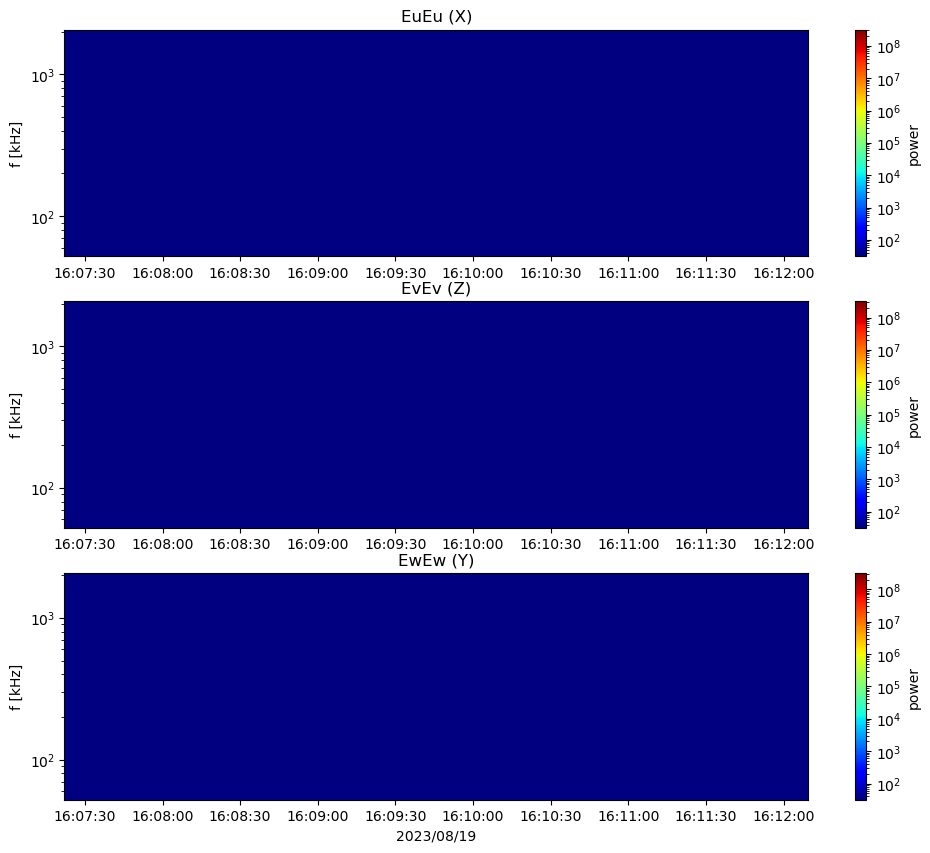

In [35]:
fig2d = plt.figure(figsize=[12,10])

ax1 = fig2d.add_subplot(3, 1, 1)
ax2 = fig2d.add_subplot(3, 1, 2)
ax3 = fig2d.add_subplot(3, 1, 3)

# Y-axis
# ax1.set_ylim(f_min, f_max)
# ax2.set_ylim(f_min, f_max)
# ax3.set_ylim(f_min, f_max)
ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')
ax1.set_ylabel('f [kHz]')
ax2.set_ylabel('f [kHz]')
ax3.set_ylabel('f [kHz]')

# X-axis
ax1.set_title('EuEu (X)')
ax2.set_title('EvEv (Z)')
ax3.set_title('EwEw (Y)')
date = data.epoch[0]
date = date.strftime('%Y/%m/%d')
ax3.set_xlabel(date)

# Plot
p1 = ax1.pcolormesh(Epoch_1d, freq_1d, EuEu_c_2d, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')
p2 = ax2.pcolormesh(Epoch_1d, freq_1d, EvEv_c_2d, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')
p3 = ax3.pcolormesh(Epoch_1d, freq_1d, EwEw_c_2d, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')

if cal_mode == 0:
    str = 'Power [RAW]'
elif cal_mode == 1:
    str = 'Power [dBm@AD]'
elif cal_mode == 2:
    str = 'Power [V2@ADC]'
pp1 = fig2d.colorbar(p1, ax=ax1, orientation="vertical")
pp1.set_label('power')
pp2 = fig2d.colorbar(p2, ax=ax2, orientation="vertical")
pp2.set_label('power')
pp3 = fig2d.colorbar(p3, ax=ax3, orientation="vertical")
pp3.set_label('power')

plt.show()
png_fname = work_dir+data_name+'_FT-log-clean.png'
# fig2d.savefig(png_fname)

## CLEANED -- FT

/var/folders/h3/4_tnwr0x0v9gcl5qc0vczzyr0000gn/T/ipykernel_63644/3540108199.py:24: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  p1 = ax1.pcolormesh(Epoch_1d, freq_1d, EuEu_c_2d, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')
/var/folders/h3/4_tnwr0x0v9gcl5qc0vczzyr0000gn/T/ipykernel_63644/3540108199.py:25: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  p2 = ax2.pcolormesh(Epoch_1d, freq_1d, EvEv_c_2d, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')
/var/folders/h3/4_tnwr0x0v9gcl5qc0vczzyr0000gn/T/ipykernel_63644/3540108199.py:26: UserWarning: The 

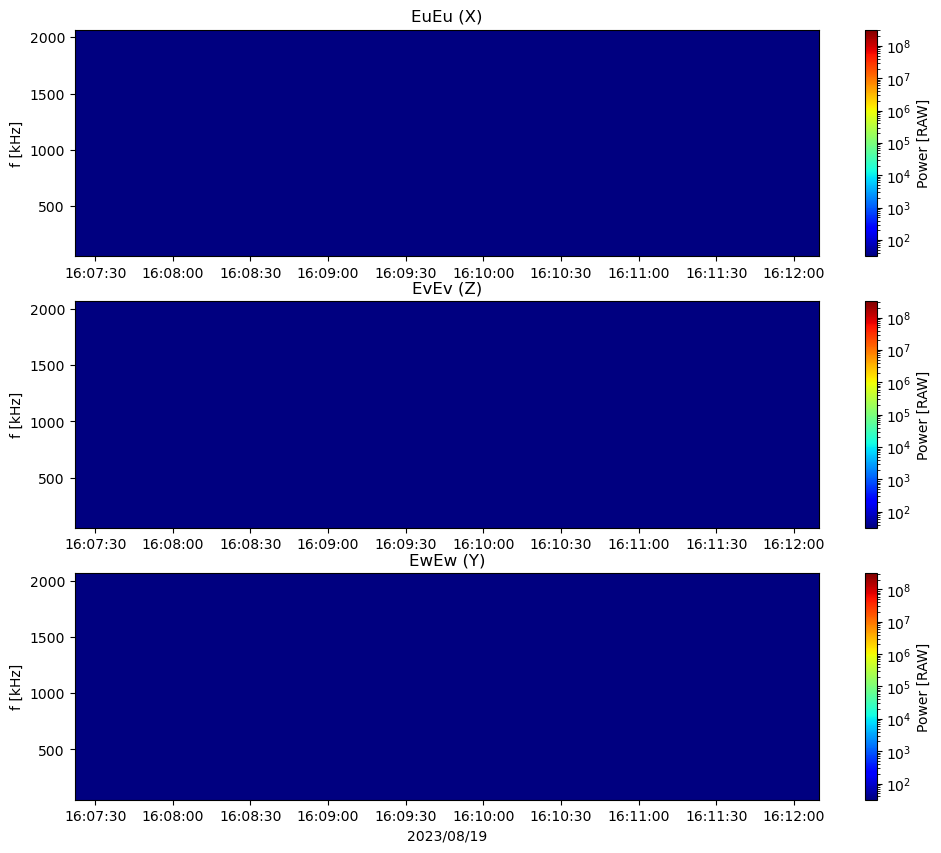

In [36]:
fig2d = plt.figure(figsize=[12,10])

ax1 = fig2d.add_subplot(3, 1, 1)
ax2 = fig2d.add_subplot(3, 1, 2)
ax3 = fig2d.add_subplot(3, 1, 3)

# Y-axis
# ax1.set_ylim(f_min, f_max)
# ax2.set_ylim(f_min, f_max)
# ax3.set_ylim(f_min, f_max)
ax1.set_ylabel('f [kHz]')
ax2.set_ylabel('f [kHz]')
ax3.set_ylabel('f [kHz]')

# X-axis
ax1.set_title('EuEu (X)')
ax2.set_title('EvEv (Z)')
ax3.set_title('EwEw (Y)')
date = data.epoch[0]
date = date.strftime('%Y/%m/%d')
ax3.set_xlabel(date)

# Plot
p1 = ax1.pcolormesh(Epoch_1d, freq_1d, EuEu_c_2d, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')
p2 = ax2.pcolormesh(Epoch_1d, freq_1d, EvEv_c_2d, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')
p3 = ax3.pcolormesh(Epoch_1d, freq_1d, EwEw_c_2d, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')

if cal_mode == 0:
    str = 'Power [RAW]'
elif cal_mode == 1:
    str = 'Power [dBm@AD]'
elif cal_mode == 2:
    str = 'Power [V^2@ADC]'
pp1 = fig.colorbar(p1, ax=ax1, orientation="vertical")
pp1.set_label(str)
pp2 = fig.colorbar(p2, ax=ax2, orientation="vertical")
pp2.set_label(str)
pp3 = fig.colorbar(p3, ax=ax3, orientation="vertical")
pp3.set_label(str)

plt.show()

png_fname = work_dir+data_name+'_FT-clean.png'
# fig2d.savefig(png_fname)

## CLEANED - Spec LOG

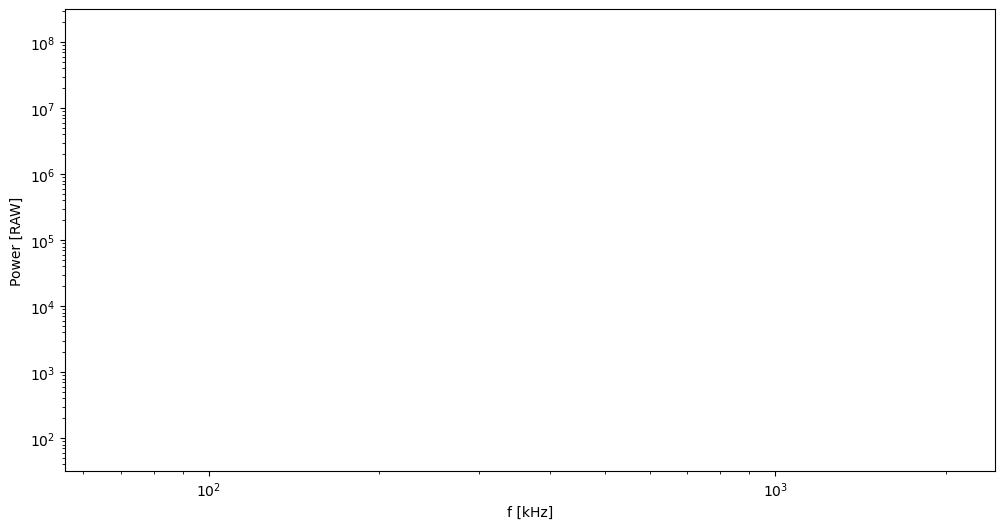

In [37]:
fig, cal = plt.subplots(figsize=(12, 6))

cal.plot(freq_1d, Eu_c_power1, ':r', linewidth=.5)
cal.plot(freq_1d, Ev_c_power1, ':b', linewidth=.5)
cal.plot(freq_1d, Ew_c_power1, ':g', linewidth=.5)
cal.plot(freq_1d, Eu_c_power2, '-r', linewidth=.5)
cal.plot(freq_1d, Ev_c_power2, '-b', linewidth=.5)
cal.plot(freq_1d, Ew_c_power2, '-g', linewidth=.5)

cal.set_xscale('log')
cal.set_xlabel('f [kHz]')
# cal.set_xlim(f_min, f_max)

cal.set_yscale('log')
if cal_mode == 0:
    plt.ylabel('Power [RAW]')
elif cal_mode == 1:
    plt.ylabel('Power [dBm@AD]')
elif cal_mode == 2:
    plt.ylabel('Power [V^2@ADC]')
cal.set_ylim(10**p_min, 10**p_max)

plt.show
png_fname = work_dir+data_name+'_spec-log-clean.png'
# fig.savefig(png_fname)

## CLEANED Spec Linear

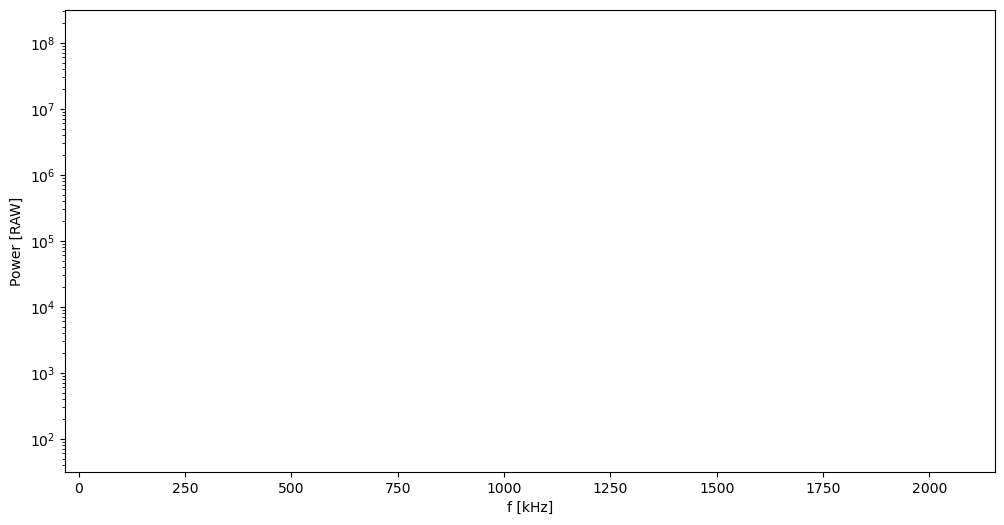

In [38]:
fig, cal = plt.subplots(figsize=(12, 6))

cal.plot(freq_1d, Eu_c_power1, ':r', linewidth=.5)
cal.plot(freq_1d, Ev_c_power1, ':b', linewidth=.5)
cal.plot(freq_1d, Ew_c_power1, ':g', linewidth=.5)
cal.plot(freq_1d, Eu_c_power2, '-r', linewidth=.5)
cal.plot(freq_1d, Ev_c_power2, '-b', linewidth=.5)
cal.plot(freq_1d, Ew_c_power2, '-g', linewidth=.5)

cal.set_xlabel('f [kHz]')
# cal.set_xlim(f_min, f_max)

cal.set_yscale('log')
if cal_mode == 0:
    plt.ylabel('Power [RAW]')
elif cal_mode == 1:
    plt.ylabel('Power [dBm@AD]')
elif cal_mode == 2:
    plt.ylabel('Power [V^2@ADC]')
cal.set_ylim(10**p_min, 10**p_max)

plt.show
png_fname = work_dir+data_name+'_spec-clean.png'
# fig.savefig(png_fname)